In [168]:
from gcodeparser import GcodeParser
import math 
import matplotlib.pyplot as plt

In [345]:
def distance(A,B):
    (xA , yA , zA , fA, eA) = A
    (xB , yB , zB , fB, eB) = B
    return math.sqrt((xA-xB)**2 + (yB-yA)**2)

In [346]:
def droite(A,B):
    (xA , yA , zA , fA, eA) = A
    (xB , yB , zB , fB, eB) = B
    if xA == xB:
        return (1 , 0 , -xA)
    a = - (yB - yA)/(xB - xA)
    c = -a*xA - yA
    return (a , 1 , c)

In [347]:
def appartien( droite , point , precision):
    (a , b , c ) = droite
    (xA , yA , zA , fA , eA ) = point
    return abs(a*xA + b*yA + c) <= precision

In [389]:
def reducepoints(points,precision, distanceMinimale):
    nPoints = list()
    nPoints.append(points[0])
    for i in range(1,len(points)-1):
        if(distance(nPoints[-1],points[i])>distanceMinimale):
            nPoints.append(points[i])
        else:
            if points[i-1][0] == points[i][0] and points[i-1][1] == points[i][1] and points[i-1][2] == points[i][2]:
                continue #si coordonnées de i et i-1 sont les mêmes on passe au suivant

            (a , b , c) = droite( points[i-1], points[i])
            if appartien((a , b , c), points[i+1],precision):
                if points[i+1]==points[-1]:
                    nPoints.append(points[-1])
                continue #si la droite de i et i-1 et le point i+1 appartient à la meme droite on continue
            else :
                if points[i+1]==points[-1]:
                    nPoints.append(points[-1])
                    nPoints.append(points[i])
                else : 
                    nPoints.append(points[i])
            
    return nPoints

In [390]:
def gcodetri(X):
    for i in range (len (X)):
        X[i]=X[i].gcode_str
        X[i]=X[i].split( )
        G,t=X[i],0
        for j in range (len (X[i])):
            if (t==1):
                G.remove(G[l])
            elif(G[j]==";"):
                G.remove(G[j])
                t=1
                l=j
    return (X)

In [391]:
def MVT(ligne):
    X,Y,Z,F,E=-1,-1,-1,-1,-1
    if ligne[0]=="G1" or ligne[0]=="G0":
        for j in range (len(ligne)-1):
            coord=ligne[j+1]
            if coord[0]=="X":
                X= float(coord.lstrip(coord[0]))
            elif coord[0]=="Y":
                Y= float(coord.lstrip(coord[0]))
            elif coord[0]=="Z":
                Z= float(coord.lstrip(coord[0]))
            elif coord[0]=="F":
                F= float(coord.lstrip(coord[0]))
            elif coord[0]=="E":
                E= float(coord.lstrip(coord[0]))
        
        return(X,Y,Z,F,E)
    elif ligne[0]=="G28":
        X=float(0)
        Y=float(0)
        Z=float(0)
        F=float(1200)
        E=float(0)
        return(X,Y,Z,F,E)

In [392]:
def remplacement(T):
    for i in range(len(T)):
        if T[i]==-1:
            T[i]=T[i-1]
    return(T)

In [393]:
# open gcode file and store contents as variable
with open('C://Users//aurel//Downloads//fichier cube gcode//aa//a//cube.gcode', 'r') as f:  
  gcode = f.read()
List,X,Y,Z,E,F=[],[],[],[],[],[]
Gcode=GcodeParser(gcode).lines# get parsed gcode link
Gcode=gcodetri(Gcode)

#for i in range (len(Gcode)):
for i in range (155,185):
    Val=MVT(Gcode[i])
    List.append(Val)

In [394]:
for i in range(len(List)):
    if List[i]!=None:
        Temp=List[i]
        X.append(Temp[0])
        Y.append(Temp[1])
        Z.append(Temp[2])
        F.append(Temp[3])
        E.append(Temp[4])

In [395]:
X=remplacement(X)
Y=remplacement(Y)
Z=remplacement(Z)
F=remplacement(F)
E=remplacement(E)


In [396]:

print("voici X=", X)
print("voici Y=", Y)
print("voici Z=", Z)
print("voici F=", F)

print(len(X),len(Y),len(Z))

voici X= [112.31, 112.123, 111.899, 111.644, 111.364, 111.07, 110.8, 109.2, 108.854, 108.777, 108.551, 108.279, 108.033, 107.872, 107.818, 107.8, 107.8, 107.833, 107.904, 108.011, 108.152, 108.324, 108.52, 108.736, 108.964, 109.2, 110.8, 111.103, 111.329, 111.539]
voici Y= [108.223, 107.981, 107.776, 107.611, 107.492, 107.421, 107.4, 107.4, 107.435, 107.451, 107.522, 107.655, 107.831, 107.994, 108.049, 109.2, 110.8, 111.103, 111.329, 111.539, 111.729, 111.892, 112.024, 112.121, 112.18, 112.2, 112.2, 112.167, 112.096, 111.989]
voici Z= [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
voici F= [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 7200.0, 7200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0]
30 30 30


In [398]:
points = [(X[i],Y[i],Z[i],E[i],F[i]) for i in range(len(X))]
print(points)
print(len(points))

[(112.31, 108.223, -1, 2.582128, -1), (112.123, 107.981, -1, 2.596369, -1), (111.899, 107.776, -1, 2.610508, -1), (111.644, 107.611, -1, 2.624651, -1), (111.364, 107.492, -1, 2.638818, -1), (111.07, 107.421, -1, 2.652901, -1), (110.8, 107.4, -1, 2.665511, -1), (109.2, 107.4, -1, 2.740014, -1), (108.854, 107.435, -1, 2.756207, -1), (108.777, 107.451, -1, 2.759869, -1), (108.551, 107.522, -1, 2.7709, -1), (108.279, 107.655, -1, 2.784998, -1), (108.033, 107.831, -1, 2.799083, -1), (107.872, 107.994, -1, 2.809776, -1), (107.818, 108.049, -1, 2.809776, 7200.0), (107.8, 109.2, -1, 2.809776, 7200.0), (107.8, 110.8, -1, 2.884279, 1200.0), (107.833, 111.103, -1, 2.898471, 1200.0), (107.904, 111.329, -1, 2.909502, 1200.0), (108.011, 111.539, -1, 2.920476, 1200.0), (108.152, 111.729, -1, 2.931493, 1200.0), (108.324, 111.892, -1, 2.942528, 1200.0), (108.52, 112.024, -1, 2.953531, 1200.0), (108.736, 112.121, -1, 2.964557, 1200.0), (108.964, 112.18, -1, 2.975523, 1200.0), (109.2, 112.2, -1, 2.986551

[(112.31, 108.223, -1, 2.582128, -1), (111.364, 107.492, -1, 2.638818, -1), (110.8, 107.4, -1, 2.665511, -1), (109.2, 107.4, -1, 2.740014, -1), (108.033, 107.831, -1, 2.799083, -1), (107.818, 108.049, -1, 2.809776, 7200.0), (107.8, 109.2, -1, 2.809776, 7200.0), (107.8, 110.8, -1, 2.884279, 1200.0), (107.833, 111.103, -1, 2.898471, 1200.0), (107.904, 111.329, -1, 2.909502, 1200.0), (108.736, 112.121, -1, 2.964557, 1200.0), (109.2, 112.2, -1, 2.986551, 1200.0), (110.8, 112.2, -1, 3.061054, 1200.0), (111.539, 111.989, -1, 3.097252, 1200.0)]
14


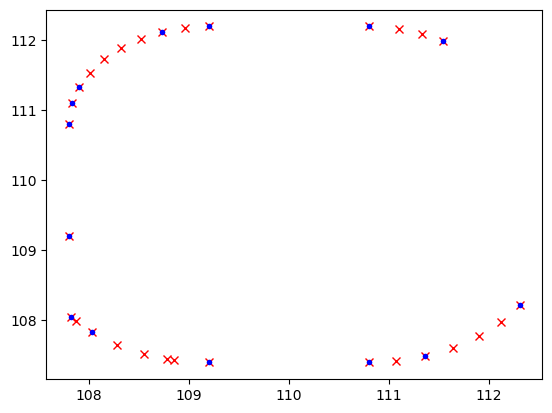

In [405]:
pp = reducepoints(points,0.1,1)
print(pp)
print(len(pp))
x1=[i[0] for i in pp]
y1=[i[1] for i in pp]
z1=[i[2] for i in pp]
f1=[i[3] for i in pp]
e1=[i[4] for i in pp]



plt.plot(X, Y, 'rx')
plt.plot(x1, y1, 'b.')